In [333]:
from HelperFunctions import *
import time
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [334]:
# 5, 10, 15, 20
pval = 5
resultsfull = pickle.load(open('SPOresultsAllVars.pkl','rb')).unstack().stack(0).droplevel(['grid_dim'])

results = resultsfull[(resultsfull.reset_index()['p'] == pval).values].droplevel(['p']).copy()

In [335]:
results['SPO diff'] = 100 * (results['SPO_loss_SGD'] - results['SPO_loss_direct']) / results['SPO_loss_direct']
results['SPO+ diff'] = 100 * (results['SPO_plus_loss_SGD'] - results['SPO_plus_loss_direct']) / results['SPO_plus_loss_direct']

In [336]:
lossdiffs = results[['SPO diff','SPO+ diff']]

In [337]:
lossmeans = lossdiffs.groupby('n').mean()
lossSD = lossdiffs.groupby('n').std()

lossLB = lossmeans - 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
lossUB = lossmeans + 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean

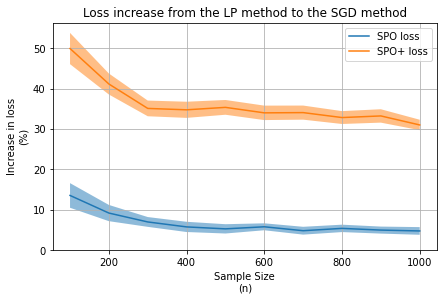

In [338]:
plt.plot(lossmeans.index,lossmeans['SPO diff'], label='SPO loss')
plt.fill_between(lossmeans.index,lossLB['SPO diff'],lossUB['SPO diff'], alpha=0.5)

plt.plot(lossmeans.index,lossmeans['SPO+ diff'], label='SPO+ loss')
plt.fill_between(lossmeans.index,lossLB['SPO+ diff'],lossUB['SPO+ diff'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Increase in loss\n(%)')

plt.title('Loss increase from the LP method to the SGD method')
plt.tight_layout(pad=0.1)
plt.grid()

plt.savefig('LossComparison.png')

In [339]:
runtimes = results[['direct_runtime','SGD_runtime']]

In [340]:
runtimemeans = runtimes.groupby('n').mean()
runtimeSD = runtimes.groupby('n').std()
runtimeUB = runtimes.groupby('n').quantile(0.975)
runtimeLB = runtimes.groupby('n').quantile(0.025)
#runtimeLB = runtimemeans - 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean
#runtimeUB = runtimemeans + 1.96*runtimeSD/np.sqrt(30) #95% confidence interval for the mean

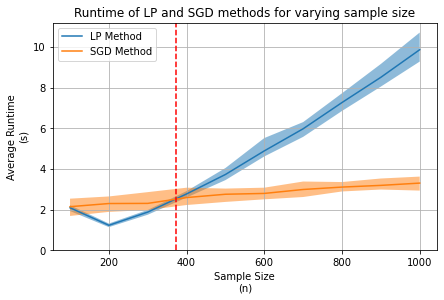

In [341]:
plt.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
plt.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

plt.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
plt.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Average Runtime\n(s)')
plt.title('Runtime of LP and SGD methods for varying sample size')
plt.tight_layout(pad=0.1)
plt.grid()
plt.axvline(372,c='r',linestyle='--')
plt.savefig('Runtime.png')

In [342]:
SPOlosses = results[['SPO_loss_SGD','SPO_loss_direct']]
SPO_plus_losses = results[['SPO_plus_loss_SGD','SPO_plus_loss_direct']]

In [343]:
SPOlossesmeans = SPOlosses.groupby('n').mean()
SPOlossesSD = SPOlosses.groupby('n').std()
SPOlossesLB = SPOlossesmeans - 1.96 * SPOlossesSD / np.sqrt(30)
SPOlossesUB = SPOlossesmeans + 1.96 * SPOlossesSD / np.sqrt(30)

SPO_plus_means = SPO_plus_losses.groupby('n').mean()
SPO_plus_SD = SPO_plus_losses.groupby('n').std()
SPO_plus_LB = SPO_plus_means - 1.96 * SPO_plus_SD / np.sqrt(30)
SPO_plus_UB = SPO_plus_means + 1.96 * SPO_plus_SD / np.sqrt(30)

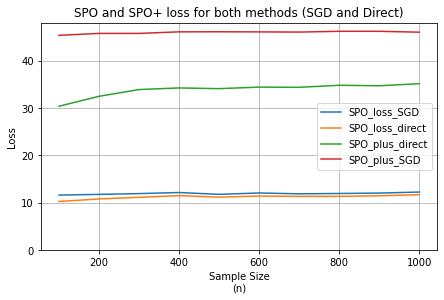

In [344]:
# plot each loss 

# SPO loss SGD
plt.plot(SPOlossesmeans.index, SPOlossesmeans['SPO_loss_SGD'], label='SPO_loss_SGD')
#plt.fill_between(SPOlossesmeans.index,SPOlossesLB['SPO_loss_SGD'],SPOlossesUB['SPO_loss_SGD'], alpha=0.5, color = 'r')

# SPO loss direct
plt.plot(SPOlossesmeans.index,SPOlossesmeans['SPO_loss_direct'], label='SPO_loss_direct')
#plt.fill_between(SPOlossesmeans.index,SPOlossesLB['SPO_loss_direct'],SPOlossesUB['SPO_loss_direct'], alpha=0.5, color = 'b')


#SPO plus loss DIRECT
plt.plot(SPO_plus_means.index,SPO_plus_means['SPO_plus_loss_direct'], label='SPO_plus_direct')
#plt.fill_between(SPO_plus_means.index,SPO_plus_LB['SPO_plus_loss_direct'],SPO_plus_UB['SPO_plus_loss_direct'], alpha=0.5)
#SPO plus loss SGD
plt.plot(SPO_plus_means.index,SPO_plus_means['SPO_plus_loss_SGD'], label='SPO_plus_SGD')
#plt.fill_between(SPO_plus_means.index,SPO_plus_LB['SPO_plus_loss_SGD'],SPO_plus_UB['SPO_plus_loss_SGD'], alpha=0.5)

#plt.axhline(0, c='k')
plt.ylim(0)
plt.legend()
plt.xlabel('Sample Size\n(n)')
plt.ylabel('Loss')


plt.title('SPO and SPO+ loss for both methods (SGD and Direct)')
plt.tight_layout(pad=0.1)
plt.grid()

plt.savefig('LossComparison.png')

In [345]:
def plot_function(lossmeans, ub, lb, p, title, filename, x_label, y_label, type, intersection = 380):
    if type == 'loss':
        plt.plot(lossmeans.index,lossmeans['SPO diff'], label='SPO loss')
        plt.fill_between(lossmeans.index,lossLB['SPO diff'],lossUB['SPO diff'], alpha=0.5)

        plt.plot(lossmeans.index,lossmeans['SPO+ diff'], label='SPO+ loss')
        plt.fill_between(lossmeans.index,lossLB['SPO+ diff'],lossUB['SPO+ diff'], alpha=0.5)
    #plt.axhline(0, c='k')
    else:
        plt.plot(runtimemeans.index,runtimemeans['direct_runtime'], label='LP Method')
        plt.fill_between(runtimemeans.index,runtimeLB['direct_runtime'],runtimeUB['direct_runtime'], alpha=0.5)

        plt.plot(runtimemeans.index,runtimemeans['SGD_runtime'], label='SGD Method')
        plt.fill_between(runtimemeans.index,runtimeLB['SGD_runtime'],runtimeUB['SGD_runtime'], alpha=0.5)
    plt.ylim(0)
    plt.legend()
    if type == 'runtime' and p == 5:
        plt.axvline(intersection,c='r',linestyle='--')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout(pad=0.1)
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.close()


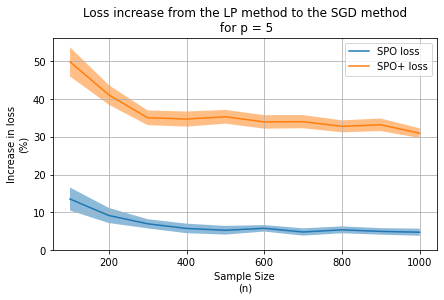

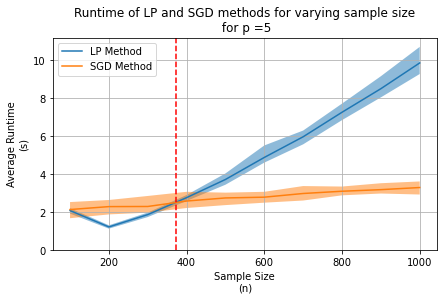

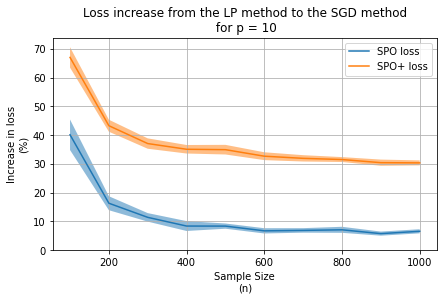

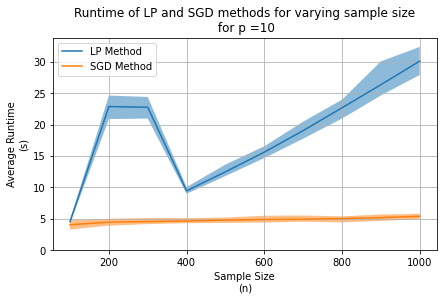

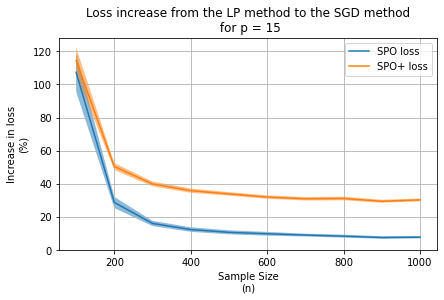

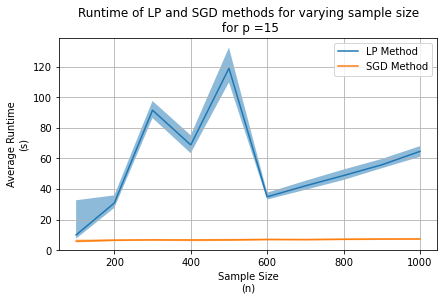

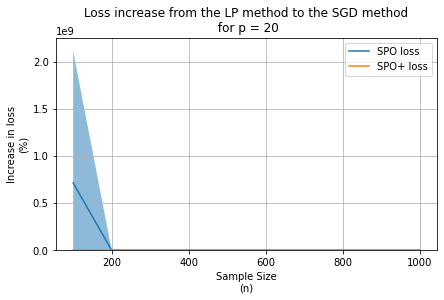

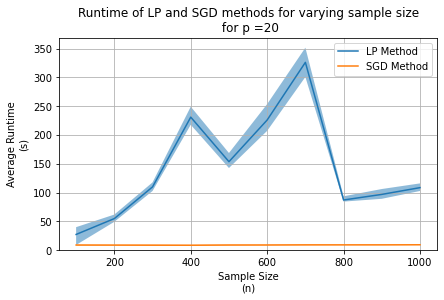

In [346]:
#pvals = [5,10,15,20]
pvals = [5,10,15,20]
resultsfull = pickle.load(open('SPOresultsAllVars.pkl','rb')).unstack().stack(0).droplevel(['grid_dim'])
#results = resultsfull.copy()
figure = 0
for p in pvals: 
    
    #pval=5

    results=resultsfull[(resultsfull.reset_index()['p']==p).values].droplevel(['p']).copy()
   

    # LOSS PLOTTING 
    results['SPO diff'] = 100 * (results['SPO_loss_SGD'] - results['SPO_loss_direct']) / results['SPO_loss_direct']
    results['SPO+ diff'] = 100 * (results['SPO_plus_loss_SGD'] - results['SPO_plus_loss_direct']) / results['SPO_plus_loss_direct']
    lossdiffs = results[['SPO diff','SPO+ diff']]

    lossmeans = lossdiffs.groupby('n').mean()
    lossSD = lossdiffs.groupby('n').std()
    lossLB = lossmeans - 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean
    lossUB = lossmeans + 1.96 * lossSD / np.sqrt(30) #95% confidence interval for the mean

    # plot vars
    title = 'Loss increase from the LP method to the SGD method\n for p = ' + str(p)
    filename = 'Plots/LossComaprison_' + str(p)+ '.png'
    x_label = 'Sample Size\n(n)'
    y_label = 'Increase in loss\n(%)'
    type = 'loss'
   
    plot_function(lossmeans, lossUB, lossLB, p, title, filename, x_label, y_label, type)


    # RUNTIME PLOTTING 

    runtimes = results[['direct_runtime','SGD_runtime']]
    runtimemeans = runtimes.groupby('n').mean()
    runtimeSD = runtimes.groupby('n').std()
    runtimeUB = runtimes.groupby('n').quantile(0.975)
    runtimeLB = runtimes.groupby('n').quantile(0.025)
 
    
    title = 'Runtime of LP and SGD methods for varying sample size\n for p =' + str(p)
    x_label = 'Sample Size\n(n)'
    
    filename = 'Plots/Runtime_' + str(p)+ '.png'
    y_label = 'Average Runtime\n(s)'
    type = 'runtime'

    plot_function(runtimemeans, runtimeUB, runtimeLB, p, title, filename, x_label, y_label, type, intersection = 374)


